In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
md = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Music Classification/MusicDataset.csv")
md.head()

,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_name,duration,end_of_fade_in,key,...,mode_confidence,release,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,year,bbhot
0,0.780462,0.574275,ARMQHX71187B9890D3,NaN,"Atlanta, GA",NaN,Mastodon,280.21506,0.238,5,...,0.500,Call of the Mastodon,0.597641,275.528,173.205,5,0.120,Deep Sea Creature,2001,0
1,0.581794,0.401998,ARD7TVE1187B99BFB1,NaN,California - LA,NaN,Casual,218.93179,0.247,1,...,0.636,Fear Itself,0.602120,218.932,92.198,4,0.778,I Didn't Mean To,0,0
2,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,"Memphis, TN",-90.04892,The Box Tops,148.03546,0.148,6,...,0.430,Dimensions,NaN,137.915,121.274,4,0.384,Soul Deep,1969,1
3,0.487357,0.343428,ARKRRTF1187B9984DA,NaN,NaN,NaN,Sonora Santanera,177.47546,0.282,8,...,0.565,Las Numero 1 De La Sonora Santanera,NaN,172.304,100.070,1,0.000,Amor De Cabaret,0,0
4,0.630382,0.454231,AR7G5I41187FB4CE6C,NaN,"London, England",NaN,Adam Ant,233.40363,0.000,0,...,0.749,Friend Or Foe,NaN,217.124,119.293,4,0.000,Something Girls,1982,0


In [3]:
md.columns

Index(['artist_familiarity', 'artist_hotttnesss', 'artist_id',
       'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name',
       'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness',
       'mode', 'mode_confidence', 'release', 'song_hotttnesss',
       'start_of_fade_out', 'tempo', 'time_signature',
       'time_signature_confidence', 'title', 'year', 'bbhot'],
      dtype='object')

In [4]:
md.shape

(10001, 23)

In [5]:
md.isnull().sum()

,0
artist_familiarity,4
artist_hotttnesss,0
artist_id,0
artist_latitude,6259
artist_location,4292
artist_longitude,6259
artist_name,0
duration,0
end_of_fade_in,0
key,0


In [6]:
drop_list = ['artist_latitude','artist_location','artist_longitude','artist_name','release','title']
train = md.drop(drop_list,axis=1)

In [7]:
train['song_hotttnesss'] = train['song_hotttnesss'].fillna(train['song_hotttnesss'].mean())

In [8]:
train['artist_familiarity'] = train['artist_familiarity'].fillna(train['artist_familiarity'].median())

In [9]:
train.isnull().sum()

,0
artist_familiarity,0
artist_hotttnesss,0
artist_id,0
duration,0
end_of_fade_in,0
key,0
key_confidence,0
loudness,0
mode,0
mode_confidence,0


In [10]:
md.head()

,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_name,duration,end_of_fade_in,key,...,mode_confidence,release,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,year,bbhot
0,0.780462,0.574275,ARMQHX71187B9890D3,NaN,"Atlanta, GA",NaN,Mastodon,280.21506,0.238,5,...,0.500,Call of the Mastodon,0.597641,275.528,173.205,5,0.120,Deep Sea Creature,2001,0
1,0.581794,0.401998,ARD7TVE1187B99BFB1,NaN,California - LA,NaN,Casual,218.93179,0.247,1,...,0.636,Fear Itself,0.602120,218.932,92.198,4,0.778,I Didn't Mean To,0,0
2,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,"Memphis, TN",-90.04892,The Box Tops,148.03546,0.148,6,...,0.430,Dimensions,NaN,137.915,121.274,4,0.384,Soul Deep,1969,1
3,0.487357,0.343428,ARKRRTF1187B9984DA,NaN,NaN,NaN,Sonora Santanera,177.47546,0.282,8,...,0.565,Las Numero 1 De La Sonora Santanera,NaN,172.304,100.070,1,0.000,Amor De Cabaret,0,0
4,0.630382,0.454231,AR7G5I41187FB4CE6C,NaN,"London, England",NaN,Adam Ant,233.40363,0.000,0,...,0.749,Friend Or Foe,NaN,217.124,119.293,4,0.000,Something Girls,1982,0


In [11]:
train['bbhot'].value_counts()

,count
bbhot,
0,8809
1,1192


In [12]:
Y = train['bbhot']

In [13]:
def freq(col):
   g = sns.kdeplot(train[col][(train["bbhot"] == 1)], color="Blue")
   g.set_xlabel(col)
   g.set_ylabel("Frequency")
   g = g.legend(["1"])
   plt.show()

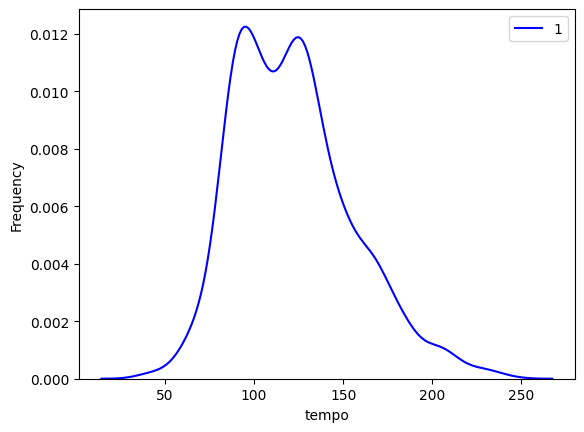

In [14]:
freq("tempo")

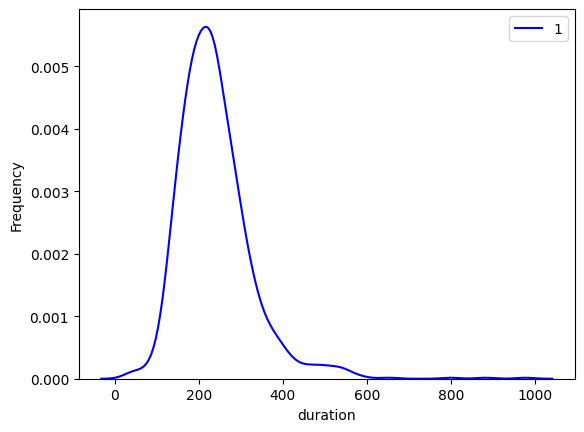

In [15]:
freq("duration")

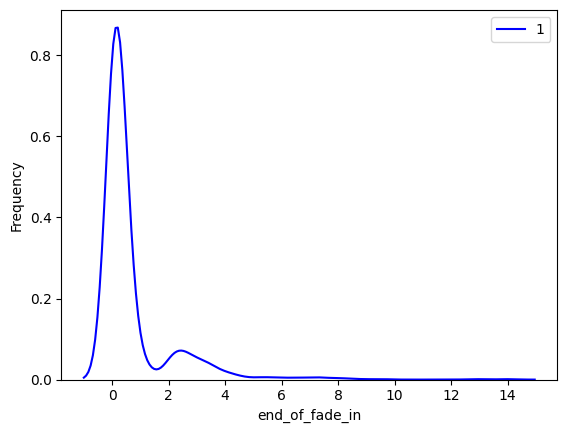

In [16]:
freq("end_of_fade_in")

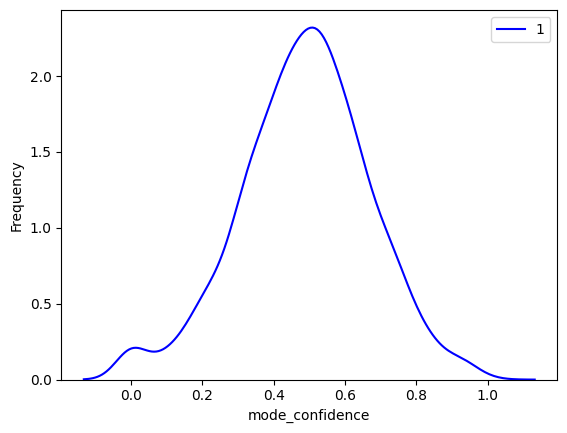

In [17]:
freq("mode_confidence")

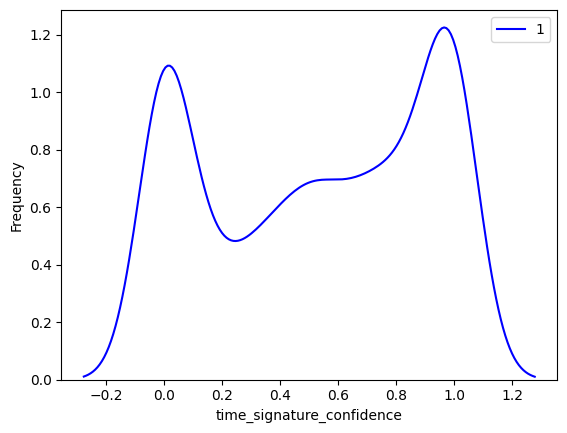

In [18]:
freq("time_signature_confidence")

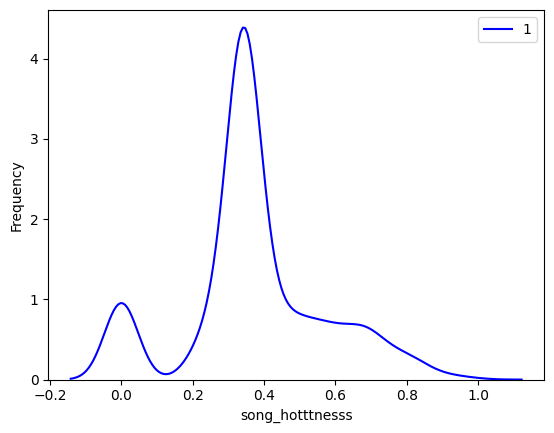

In [19]:
freq("song_hotttnesss")

In [20]:
train = train.drop(columns=['artist_id', 'bbhot','end_of_fade_in', 'key', 'key_confidence', 'mode', 'mode_confidence', 'year'],axis =1)
train.head()

,artist_familiarity,artist_hotttnesss,duration,loudness,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence
0,0.780462,0.574275,280.21506,-3.306,0.597641,275.528,173.205,5,0.120
1,0.581794,0.401998,218.93179,-11.197,0.602120,218.932,92.198,4,0.778
2,0.630630,0.417500,148.03546,-9.843,0.342867,137.915,121.274,4,0.384
3,0.487357,0.343428,177.47546,-9.689,0.342867,172.304,100.070,1,0.000
4,0.630382,0.454231,233.40363,-9.013,0.342867,217.124,119.293,4,0.000


In [21]:
x_train, x_test, y_train, y_test = train_test_split(train, Y, test_size=0.2, random_state=42)

In [22]:
nn_model = MLPClassifier(hidden_layer_sizes=(100, 100, 50), max_iter=500, activation='relu',solver='adam',random_state=10)
nn_model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 50), max_iter=500, random_state=10)

In [23]:
y_pred = nn_model.predict(x_test)

In [24]:
nn_model.score(x_test, y_test)

0.8810594702648675

In [28]:
import warnings
warnings.filterwarnings('ignore')
res = classification_report(y_test, y_pred)
res

'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.94      1763\n           1       0.00      0.00      0.00       238\n\n    accuracy                           0.88      2001\n   macro avg       0.44      0.50      0.47      2001\nweighted avg       0.78      0.88      0.83      2001\n'

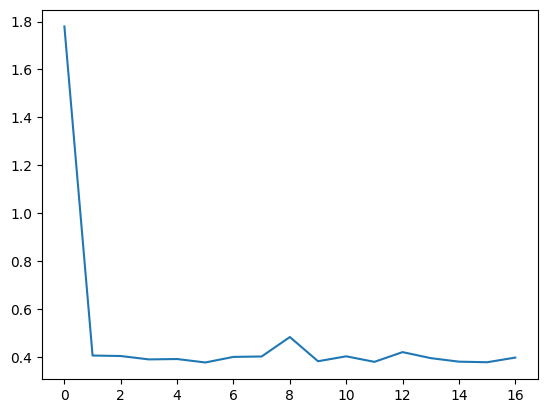

In [29]:
loss_values = nn_model.loss_curve_
plt.plot(loss_values)
plt.show()

In [ ]:
import pickle